# Project 3 - Predicting the Age of Abalone
## Linear Regression Models

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Preprocessing

In [27]:
# Read in unscaled version of the dataset
unscaled_df = pd.read_csv('./Dataset/abalone_unscaled_data.csv')
unscaled_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [28]:
orig_df = unscaled_df.copy()

In [29]:
# Label Encode the categorical "Sex" column
# Note: Female => 0
#       Infant => 1
#       Male   => 2
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
unscaled_df['Sex_LabelEncoded'] = le.fit_transform(unscaled_df['Sex'])
unscaled_df.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Sex_LabelEncoded
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5,2
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5,2
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5,0
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5,2
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5,1


In [30]:
# Binary encode the categorical "Sex" column
unscaled_df = pd.get_dummies(unscaled_df, prefix=['Sex'], columns=['Sex'])
unscaled_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Sex_LabelEncoded,Sex_F,Sex_I,Sex_M
0,91,73,19,102.8,44.9,20.2,30.0,15,16.5,2,0,0,1
1,70,53,18,45.1,19.9,9.7,14.0,7,8.5,2,0,0,1
2,106,84,27,135.4,51.3,28.3,42.0,9,10.5,0,1,0,0
3,88,73,25,103.2,43.1,22.8,31.0,10,11.5,2,0,0,1
4,66,51,16,41.0,17.9,7.9,11.0,7,8.5,1,0,1,0


In [31]:
# Reorganize columns
column_order = ["Sex_LabelEncoded", "Sex_M", "Sex_F", "Sex_I", "Length", 
                "Diameter", "Height", "Whole_weight", "Shucked_weight", 
                "Viscera_weight", "Shell_weight", "Rings", "Age"]
unscaled_df = unscaled_df.reindex(columns=column_order)
unscaled_df.head()

,Sex_LabelEncoded,Sex_M,Sex_F,Sex_I,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,2,1,0,0,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,2,1,0,0,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,0,0,1,0,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,2,1,0,0,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,1,0,0,1,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [32]:
# Binning the Rings column
unscaled_df['Rings_Bin']=pd.cut(unscaled_df['Rings'], bins=6, labels=False)

In [33]:
# Display the cross-reference between Rings and Rings_Bin
xref_df = unscaled_df.copy()
xref_df = xref_df[["Rings", "Rings_Bin"]]
xref_df.drop_duplicates().sort_values(by=['Rings'])


,Rings,Rings_Bin
236,1,0
719,2,0
237,3,0
44,4,0
42,5,0
48,6,1
1,7,1
5,8,1
2,9,1
3,10,1


## Choose your X and y

In [231]:
# Determine X using Sex LabelEncoded
X = unscaled_df[['Sex_LabelEncoded', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]


In [261]:
# Determine X using Sex BinaryEncoded
X = unscaled_df[['Sex_M', 'Sex_F', 'Sex_I', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]


In [262]:
# Determine y without Rings_Bin
y = unscaled_df["Rings"].values.reshape(-1,1)


In [273]:
# Determine y WITH Rings_Bin
y = unscaled_df["Rings_Bin"].values.reshape(-1,1)


## Choose your Train-Test-Split

In [274]:
# Without Stratify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [283]:
# WITH Stratfiy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Choose your Scaler

In [284]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [286]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [288]:
from sklearn.preprocessing import RobustScaler

X_scaler = RobustScaler().fit(X_train)
y_scaler = RobustScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [290]:
from sklearn.preprocessing import PowerTransformer

X_scaler = PowerTransformer().fit(X_train)
y_scaler = PowerTransformer().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Linear Regression

In [81]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

## Linear LASSO

In [168]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5881662828092703, R2: 0.40734083141184974


## Linear Ridge

In [229]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5789871582493307, R2: 0.4165900734868583


## Linear ElasticNet

In [291]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE= {MSE}, R2= {r2}")

MSE= 0.5852948810291315, R2= 0.4102341672616563


In [100]:
# Display the coefficients
coeff_df = pd.DataFrame(model.coef_.ravel(), X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Sex_LabelEncoded,0.005840
Length,-0.036284
Diameter,0.288390
Height,0.451638
Whole_weight,0.916829
Shucked_weight,-1.115356
Viscera_weight,-0.238686
Shell_weight,0.336420


In [101]:
# Display Actual vs Predicted values
y_pred = model.predict(X_test_scaled)
act_v_pred_df = pd.DataFrame({'Actual': y_test_scaled.flatten(), 'Predicted': y_pred.flatten()})
act_v_pred_df

,Actual,Predicted
0,0.285714,0.383271
1,0.250000,0.323597
2,0.535714,0.463561
3,0.285714,0.389530
4,0.464286,0.355358
...,...,...
1040,0.392857,0.306237
1041,0.285714,0.307352
1042,0.250000,0.404842
1043,0.285714,0.344504


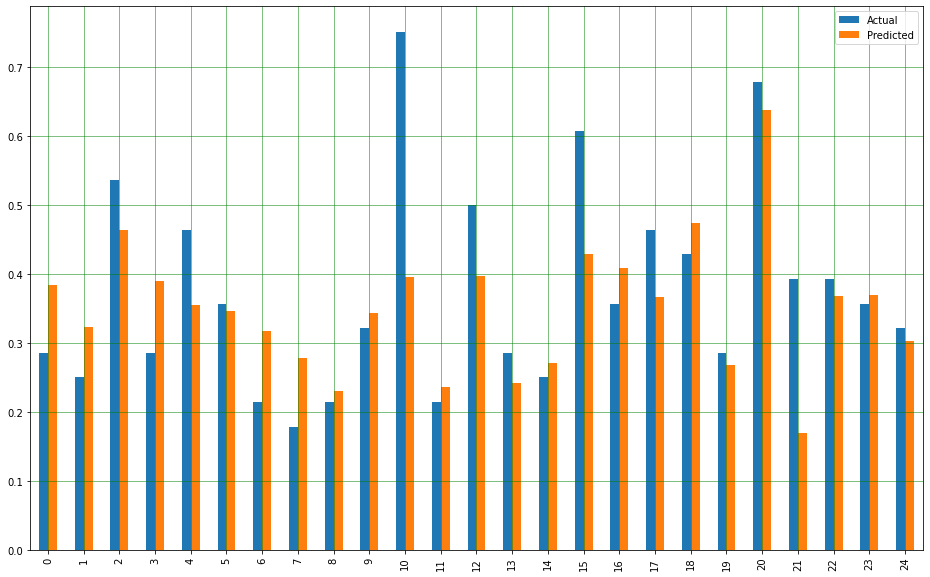

In [102]:
act_v_pred_plot_df = act_v_pred_df.head(25)
act_v_pred_plot_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

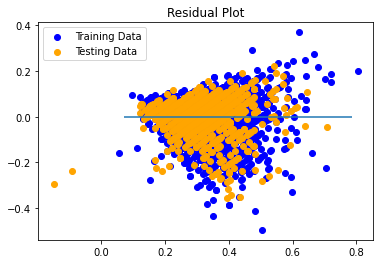

In [103]:
# Residual Plot
predictions = model.predict(X_test_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
#plt.savefig("./ResidualPlot024.png")
plt.show()


In [104]:
# Display model scores
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.006148368504522266, R2: 0.5314335652471704
